In [1]:
%pylab --no-import-all notebook
import matplotlib.pyplot as plt
import pandas as pd
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "seznam.npy").tolist()

<IPython.core.display.Javascript object>


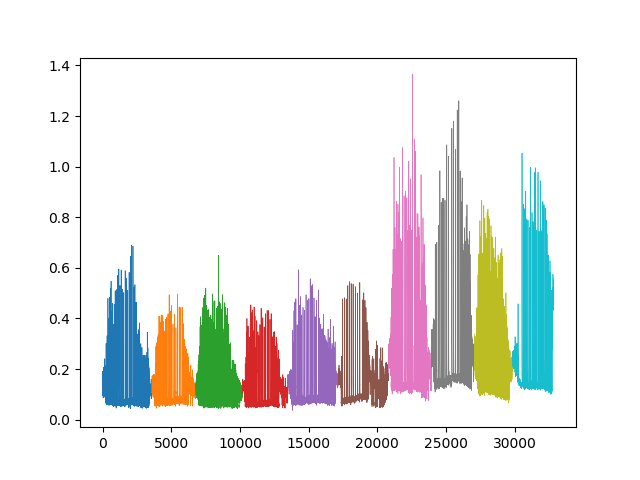

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist[:-1]]
tmp.append(np.load(way1 + "No11.npy")[1])
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


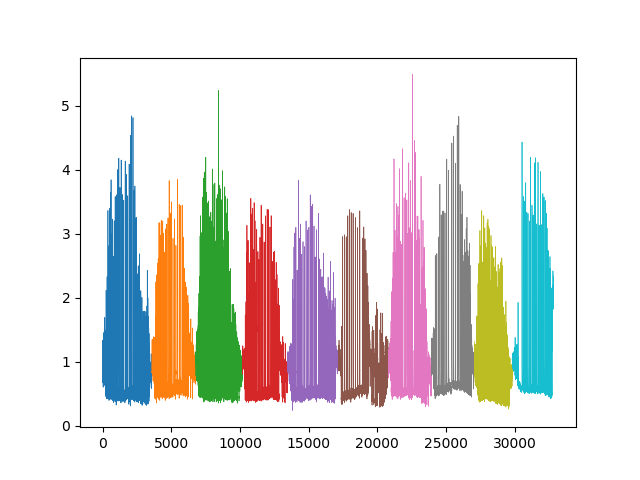

In [4]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist[:-1]]
norma.append(CL.normalization(np.load(way1 + "No11.npy")[1] , delka_useku = 20, training_set = True))
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [5]:
train_data = []
test_data = []
for data in trlist[:-1]:
    train_data.append(np.load(way1 + data))

train_data.append(np.load(way1 + "No11.npy"))    
test_data.append(copy(train_data[-1]))

In [7]:
valid_tab = []
for i in range(1,11):
    valid_tab.append(pd.read_csv(valid_path + "Real_data_KM_" + str(i) + "_Hm.csv"))

In [8]:
Sorted_tab = []
for val in valid_tab:
    Sorted_tab.append(val.sort_values(['Accuracy'], ascending=False))

In [10]:
Sorted_tab[0].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3024,"(1, 0, 1, 1, 1)","(6, 10, 12, 12)",0.777667,667,0.930099,0.607642,0.409881,0.649207,0.878325,0.502311,0.697819,0.988359,0.768868,0.290155
856,"(0, 0, 1, 1, 1)","(6, 8, 12, 12)",0.777667,667,0.928962,0.611632,0.406966,0.649187,0.875429,0.507788,0.695925,0.989468,0.768868,0.287565
4090,"(1, 1, 1, 1, 1)","(6, 10, 12, 12)",0.777333,668,0.930342,0.606512,0.408425,0.648426,0.878758,0.500768,0.696875,0.988359,0.768868,0.288860
2988,"(1, 0, 1, 1, 1)","(6, 8, 12, 12)",0.777333,668,0.928962,0.611059,0.405505,0.648508,0.875429,0.506998,0.694969,0.989468,0.768868,0.286269
4054,"(1, 1, 1, 1, 1)","(6, 8, 12, 12)",0.777333,668,0.928962,0.611059,0.405505,0.648508,0.875429,0.506998,0.694969,0.989468,0.768868,0.286269
2029,"(0, 1, 1, 1, 1)","(0, 8, 12, 11)",0.777000,669,0.929614,0.611265,0.401480,0.647453,0.877461,0.502276,0.702265,0.988359,0.780660,0.281088
4161,"(1, 1, 1, 1, 1)","(0, 8, 12, 11)",0.777000,669,0.929614,0.611265,0.401480,0.647453,0.877461,0.502276,0.702265,0.988359,0.780660,0.281088
1922,"(0, 1, 1, 1, 1)","(6, 8, 12, 12)",0.777000,669,0.928962,0.610487,0.404040,0.647830,0.875429,0.506211,0.694006,0.989468,0.768868,0.284974
854,"(0, 0, 1, 1, 1)","(6, 8, 12, 10)",0.777000,669,0.928274,0.612782,0.402574,0.647877,0.873777,0.509375,0.693038,0.990022,0.768868,0.283679
3095,"(1, 0, 1, 1, 1)","(0, 8, 12, 11)",0.777000,669,0.929614,0.610546,0.402585,0.647582,0.877461,0.502283,0.700965,0.988359,0.778302,0.282383


In [11]:
Sorted_tab[1].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.563181,1203,0.699639,0.622827,0.240283,0.520916,0.539532,0.525510,0.977011,0.994867,0.764378,0.136986
1946,"(0, 1, 1, 1, 1)","(6, 8, 16, 12)",0.562818,1204,0.694624,0.629403,0.240793,0.521607,0.533590,0.535854,0.994152,0.994867,0.762523,0.136986
4077,"(1, 1, 1, 1, 1)","(6, 8, 16, 11)",0.562818,1204,0.693133,0.632308,0.240793,0.522078,0.531833,0.540079,0.994152,0.994867,0.762523,0.136986
4079,"(1, 1, 1, 1, 1)","(6, 8, 16, 13)",0.562818,1204,0.696621,0.625571,0.240793,0.520995,0.535951,0.530323,0.994152,0.994867,0.762523,0.136986
3012,"(1, 0, 1, 1, 1)","(6, 8, 16, 12)",0.562818,1204,0.695122,0.628440,0.240793,0.521452,0.534179,0.534460,0.994152,0.994867,0.762523,0.136986
3011,"(1, 0, 1, 1, 1)","(6, 8, 16, 11)",0.562818,1204,0.693381,0.631822,0.240793,0.521999,0.532125,0.539370,0.994152,0.994867,0.762523,0.136986
1950,"(0, 1, 1, 1, 1)","(6, 8, 16, 16)",0.562818,1204,0.699639,0.621785,0.240113,0.520512,0.539532,0.524904,0.971429,0.994867,0.762523,0.136986
1947,"(0, 1, 1, 1, 1)","(6, 8, 16, 13)",0.562818,1204,0.696371,0.626047,0.240793,0.521070,0.535655,0.531008,0.994152,0.994867,0.762523,0.136986
880,"(0, 0, 1, 1, 1)","(6, 8, 16, 12)",0.562455,1205,0.694624,0.628921,0.239546,0.521030,0.533590,0.535156,0.994118,0.994867,0.762523,0.136180
3013,"(1, 0, 1, 1, 1)","(6, 8, 16, 13)",0.562455,1205,0.696621,0.625095,0.239546,0.520421,0.535951,0.529639,0.994118,0.994867,0.762523,0.136180


In [12]:
Sorted_tab[2].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2990,"(1, 0, 1, 1, 1)","(6, 8, 12, 14)",0.803142,614,0.911330,0.728752,0.470149,0.703411,0.854898,0.573257,1.0,0.975738,1.000000,0.307317
3023,"(1, 0, 1, 1, 1)","(6, 10, 12, 11)",0.802821,615,0.910477,0.730245,0.468721,0.703148,0.852995,0.575931,1.0,0.976266,0.997519,0.306098
2989,"(1, 0, 1, 1, 1)","(6, 8, 12, 13)",0.802821,615,0.910209,0.731397,0.468721,0.703442,0.852928,0.576538,1.0,0.975738,1.000000,0.306098
2988,"(1, 0, 1, 1, 1)","(6, 8, 12, 12)",0.802821,615,0.909314,0.734062,0.468721,0.704032,0.851358,0.579856,1.0,0.975738,1.000000,0.306098
858,"(0, 0, 1, 1, 1)","(6, 8, 12, 14)",0.802501,616,0.911555,0.726781,0.467290,0.701875,0.855294,0.570822,1.0,0.975738,1.000000,0.304878
4089,"(1, 1, 1, 1, 1)","(6, 10, 12, 11)",0.802501,616,0.910477,0.729583,0.467290,0.702450,0.852995,0.575107,1.0,0.976266,0.997519,0.304878
1937,"(0, 1, 1, 1, 1)","(6, 8, 14, 15)",0.802501,616,0.917472,0.710758,0.465856,0.698029,0.865358,0.551300,1.0,0.976266,1.000000,0.303659
4054,"(1, 1, 1, 1, 1)","(6, 8, 12, 12)",0.802501,616,0.909314,0.733394,0.467290,0.703333,0.851358,0.579023,1.0,0.975738,1.000000,0.304878
3024,"(1, 0, 1, 1, 1)","(6, 10, 12, 12)",0.802501,616,0.911149,0.727602,0.467290,0.702014,0.854176,0.572650,1.0,0.976266,0.997519,0.304878
4055,"(1, 1, 1, 1, 1)","(6, 8, 12, 13)",0.802501,616,0.910209,0.730734,0.467290,0.702744,0.852928,0.575714,1.0,0.975738,1.000000,0.304878


In [13]:
Sorted_tab[3].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.706369,922,0.837356,0.663144,0.402799,0.634433,0.724876,0.583043,0.962825,0.991156,0.768760,0.254671
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.706051,923,0.837356,0.662706,0.401556,0.633873,0.724876,0.582367,0.962687,0.991156,0.768760,0.253687
3010,"(1, 0, 1, 1, 1)","(6, 8, 16, 10)",0.706051,923,0.827136,0.678937,0.406202,0.637425,0.709693,0.611794,0.959707,0.991156,0.762634,0.257620
1949,"(0, 1, 1, 1, 1)","(6, 8, 16, 15)",0.705732,924,0.835196,0.665339,0.401556,0.634030,0.721644,0.587339,0.962687,0.991156,0.767228,0.253687
883,"(0, 0, 1, 1, 1)","(6, 8, 16, 15)",0.705732,924,0.835436,0.664897,0.401556,0.633963,0.722002,0.586651,0.962687,0.991156,0.767228,0.253687
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.705732,924,0.835436,0.664897,0.401556,0.633963,0.722002,0.586651,0.962687,0.991156,0.767228,0.253687
3013,"(1, 0, 1, 1, 1)","(6, 8, 16, 13)",0.705732,924,0.831858,0.669799,0.404040,0.635232,0.716675,0.596177,0.962963,0.991156,0.764165,0.255654
3012,"(1, 0, 1, 1, 1)","(6, 8, 16, 12)",0.705732,924,0.829490,0.674324,0.404040,0.635952,0.713167,0.603386,0.962963,0.991156,0.764165,0.255654
884,"(0, 0, 1, 1, 1)","(6, 8, 16, 16)",0.705732,924,0.837597,0.661833,0.400312,0.633247,0.725236,0.581019,0.962547,0.991156,0.768760,0.252704
1950,"(0, 1, 1, 1, 1)","(6, 8, 16, 16)",0.705732,924,0.837597,0.661833,0.400312,0.633247,0.725236,0.581019,0.962547,0.991156,0.768760,0.252704


In [14]:
Sorted_tab[4].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
854,"(0, 0, 1, 1, 1)","(6, 8, 12, 10)",0.800329,728,0.891779,0.832545,0.270642,0.664989,0.811496,0.762565,0.936508,0.989691,0.916667,0.158177
853,"(0, 0, 1, 1, 1)","(6, 8, 12, 9)",0.800055,729,0.891572,0.832151,0.268966,0.664230,0.811153,0.761905,0.943548,0.989691,0.916667,0.156836
1920,"(0, 1, 1, 1, 1)","(6, 8, 12, 10)",0.800055,729,0.891572,0.831992,0.270642,0.664735,0.811153,0.762359,0.936508,0.989691,0.915625,0.158177
1919,"(0, 1, 1, 1, 1)","(6, 8, 12, 9)",0.800055,729,0.891572,0.832151,0.268966,0.664230,0.811153,0.761905,0.943548,0.989691,0.916667,0.156836
4051,"(1, 1, 1, 1, 1)","(6, 8, 12, 9)",0.800055,729,0.891572,0.832151,0.268966,0.664230,0.811153,0.761905,0.943548,0.989691,0.916667,0.156836
1921,"(0, 1, 1, 1, 1)","(6, 8, 12, 11)",0.799781,730,0.891779,0.831599,0.268349,0.663909,0.811496,0.761698,0.928571,0.989691,0.915625,0.156836
855,"(0, 0, 1, 1, 1)","(6, 8, 12, 11)",0.799781,730,0.891779,0.831599,0.268349,0.663909,0.811496,0.761698,0.928571,0.989691,0.915625,0.156836
2986,"(1, 0, 1, 1, 1)","(6, 8, 12, 10)",0.799781,730,0.891521,0.831758,0.268657,0.663979,0.811416,0.761246,0.936000,0.989175,0.916667,0.156836
2985,"(1, 0, 1, 1, 1)","(6, 8, 12, 9)",0.799781,730,0.891264,0.831917,0.268966,0.664049,0.811337,0.760794,0.943548,0.988660,0.917708,0.156836
2998,"(1, 0, 1, 1, 1)","(6, 8, 14, 10)",0.799781,730,0.893805,0.826905,0.270642,0.663784,0.815208,0.753859,0.936508,0.989175,0.915625,0.158177


In [15]:
Sorted_tab[5].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
884,"(0, 0, 1, 1, 1)","(6, 8, 16, 16)",0.760840,877,0.897430,0.689240,0.337963,0.641544,0.819628,0.526437,1.0,0.991553,0.997821,0.203343
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.760567,878,0.897430,0.688722,0.336680,0.640944,0.819628,0.525832,1.0,0.991553,0.997821,0.202414
1950,"(0, 1, 1, 1, 1)","(6, 8, 16, 16)",0.760567,878,0.897240,0.689240,0.336680,0.641053,0.819310,0.526437,1.0,0.991553,0.997821,0.202414
1949,"(0, 1, 1, 1, 1)","(6, 8, 16, 15)",0.760567,878,0.896859,0.690279,0.336680,0.641272,0.818675,0.527650,1.0,0.991553,0.997821,0.202414
1938,"(0, 1, 1, 1, 1)","(6, 8, 14, 16)",0.760567,878,0.895763,0.693939,0.335394,0.641699,0.816531,0.531940,1.0,0.992023,0.997821,0.201486
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.760295,879,0.897430,0.688204,0.335394,0.640343,0.819628,0.525229,1.0,0.991553,0.997821,0.201486
872,"(0, 0, 1, 1, 1)","(6, 8, 14, 16)",0.760295,879,0.895763,0.693414,0.334107,0.641095,0.816531,0.531323,1.0,0.992023,0.997821,0.200557
4081,"(1, 1, 1, 1, 1)","(6, 8, 16, 15)",0.760295,879,0.896859,0.689759,0.335394,0.640671,0.818675,0.527043,1.0,0.991553,0.997821,0.201486
1937,"(0, 1, 1, 1, 1)","(6, 8, 14, 15)",0.760295,879,0.895763,0.693414,0.334107,0.641095,0.816531,0.531323,1.0,0.992023,0.997821,0.200557
3923,"(1, 1, 1, 1, 0)","(6, 8, 16, 0)",0.760022,880,0.890855,0.706790,0.332817,0.643488,0.808413,0.547192,1.0,0.992023,0.997821,0.199629


In [16]:
Sorted_tab[6].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.744200,849,0.852230,0.732897,0.434008,0.673045,0.785927,0.599805,0.978102,0.930751,0.941896,0.278876
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.744200,849,0.852230,0.732897,0.434008,0.673045,0.785927,0.599805,0.978102,0.930751,0.941896,0.278876
872,"(0, 0, 1, 1, 1)","(6, 8, 14, 16)",0.744200,849,0.850322,0.735962,0.435275,0.673853,0.783103,0.603922,0.978182,0.930164,0.941896,0.279917
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.744200,849,0.851772,0.733770,0.434008,0.673183,0.785149,0.600976,0.978102,0.930751,0.941896,0.278876
1950,"(0, 1, 1, 1, 1)","(6, 8, 16, 16)",0.743899,850,0.852001,0.732897,0.432739,0.672546,0.785537,0.599805,0.978022,0.930751,0.941896,0.277836
1949,"(0, 1, 1, 1, 1)","(6, 8, 16, 15)",0.743899,850,0.851315,0.733453,0.434008,0.672925,0.784372,0.601173,0.978102,0.930751,0.940367,0.278876
1938,"(0, 1, 1, 1, 1)","(6, 8, 14, 16)",0.743899,850,0.850322,0.735522,0.434008,0.673284,0.783103,0.603330,0.978102,0.930164,0.941896,0.278876
1937,"(0, 1, 1, 1, 1)","(6, 8, 14, 15)",0.743899,850,0.849866,0.736402,0.434008,0.673425,0.782330,0.604514,0.978102,0.930164,0.941896,0.278876
4081,"(1, 1, 1, 1, 1)","(6, 8, 16, 15)",0.743899,850,0.851544,0.733015,0.434008,0.672856,0.784760,0.600586,0.978102,0.930751,0.940367,0.278876
883,"(0, 0, 1, 1, 1)","(6, 8, 16, 15)",0.743899,850,0.851315,0.733453,0.434008,0.672925,0.784372,0.601173,0.978102,0.930751,0.940367,0.278876


In [17]:
Sorted_tab[7].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
857,"(0, 0, 1, 1, 1)","(6, 8, 12, 13)",0.721583,943,0.842043,0.733042,0.446440,0.673842,0.740010,0.603604,0.994286,0.976712,0.933148,0.287841
2989,"(1, 0, 1, 1, 1)","(6, 8, 12, 13)",0.721583,943,0.841795,0.732749,0.447436,0.673993,0.739627,0.603791,0.994302,0.976712,0.931755,0.288668
856,"(0, 0, 1, 1, 1)","(6, 8, 12, 12)",0.721583,943,0.840896,0.735456,0.445443,0.673931,0.737849,0.606884,0.994269,0.977397,0.933148,0.287014
4055,"(1, 1, 1, 1, 1)","(6, 8, 12, 13)",0.721583,943,0.841795,0.732749,0.447436,0.673993,0.739627,0.603791,0.994302,0.976712,0.931755,0.288668
855,"(0, 0, 1, 1, 1)","(6, 8, 12, 11)",0.721287,944,0.839506,0.737190,0.444444,0.673714,0.735324,0.609845,0.994253,0.978082,0.931755,0.286187
2988,"(1, 0, 1, 1, 1)","(6, 8, 12, 12)",0.721287,944,0.840400,0.734469,0.446440,0.673770,0.737087,0.606721,0.994286,0.977397,0.930362,0.287841
1922,"(0, 1, 1, 1, 1)","(6, 8, 12, 12)",0.720992,945,0.840648,0.734358,0.444444,0.673150,0.737468,0.605978,0.994253,0.977397,0.931755,0.286187
4056,"(1, 1, 1, 1, 1)","(6, 8, 12, 14)",0.720992,945,0.843787,0.729155,0.445157,0.672700,0.742708,0.598926,0.991429,0.976712,0.931755,0.287014
4054,"(1, 1, 1, 1, 1)","(6, 8, 12, 12)",0.720992,945,0.840400,0.734066,0.445443,0.673303,0.737087,0.606171,0.994269,0.977397,0.930362,0.287014
2991,"(1, 0, 1, 1, 1)","(6, 8, 12, 15)",0.720697,946,0.845538,0.725693,0.444872,0.672034,0.745426,0.594835,0.988604,0.976712,0.930362,0.287014


In [18]:
Sorted_tab[8].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2992,"(1, 0, 1, 1, 1)","(6, 8, 12, 16)",0.782309,694,0.903135,0.755778,0.458853,0.705922,0.840542,0.620513,0.938776,0.975802,0.966454,0.30363
2989,"(1, 0, 1, 1, 1)","(6, 8, 12, 13)",0.781995,695,0.900866,0.760175,0.455760,0.705600,0.836618,0.625129,0.944637,0.975802,0.969649,0.30033
4058,"(1, 1, 1, 1, 1)","(6, 8, 12, 16)",0.781995,695,0.903135,0.755306,0.457571,0.705337,0.840542,0.619877,0.938567,0.975802,0.966454,0.30253
3707,"(1, 1, 1, 0, 1)","(6, 8, 12, 16)",0.781995,695,0.904655,0.753713,0.453936,0.704101,0.843178,0.615152,0.950877,0.975802,0.972843,0.29813
857,"(0, 0, 1, 1, 1)","(6, 8, 12, 13)",0.781995,695,0.900866,0.760175,0.455760,0.705600,0.836618,0.625129,0.944637,0.975802,0.969649,0.30033
4057,"(1, 1, 1, 1, 1)","(6, 8, 12, 15)",0.781995,695,0.902630,0.756250,0.457571,0.705484,0.839667,0.621150,0.938567,0.975802,0.966454,0.30253
1923,"(0, 1, 1, 1, 1)","(6, 8, 12, 13)",0.781995,695,0.900866,0.760175,0.455760,0.705600,0.836618,0.625129,0.944637,0.975802,0.969649,0.30033
2641,"(1, 0, 1, 0, 1)","(6, 8, 12, 16)",0.781681,696,0.904655,0.753247,0.452640,0.703514,0.843178,0.614531,0.950704,0.975802,0.972843,0.29703
2990,"(1, 0, 1, 1, 1)","(6, 8, 12, 14)",0.781681,696,0.901873,0.757196,0.456286,0.705119,0.838358,0.622428,0.938356,0.975802,0.966454,0.30143
509,"(0, 0, 1, 0, 1)","(6, 8, 12, 16)",0.781681,696,0.904348,0.753247,0.453936,0.703844,0.843096,0.614531,0.950877,0.975197,0.972843,0.29813


In [19]:
Sorted_tab[9].head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
1944,"(0, 1, 1, 1, 1)","(6, 8, 16, 10)",0.709399,1045,0.870818,0.596255,0.359305,0.608792,0.776627,0.440265,1.0,0.991010,0.923434,0.218995
4076,"(1, 1, 1, 1, 1)","(6, 8, 16, 10)",0.709399,1045,0.870818,0.596255,0.359305,0.608792,0.776627,0.440265,1.0,0.991010,0.923434,0.218995
878,"(0, 0, 1, 1, 1)","(6, 8, 16, 10)",0.709121,1046,0.870818,0.595808,0.358247,0.608291,0.776627,0.439779,1.0,0.991010,0.923434,0.218210
2998,"(1, 0, 1, 1, 1)","(6, 8, 14, 10)",0.708843,1047,0.869626,0.596255,0.360360,0.608747,0.775705,0.440265,1.0,0.989424,0.923434,0.219780
3010,"(1, 0, 1, 1, 1)","(6, 8, 16, 10)",0.708843,1047,0.870555,0.595363,0.358247,0.608055,0.776534,0.439294,1.0,0.990481,0.923434,0.218210
1922,"(0, 1, 1, 1, 1)","(6, 8, 12, 12)",0.708565,1048,0.866327,0.600152,0.361415,0.609298,0.769831,0.446712,1.0,0.990481,0.914153,0.220565
2999,"(1, 0, 1, 1, 1)","(6, 8, 14, 11)",0.708565,1048,0.869970,0.595522,0.359305,0.608266,0.776578,0.438944,1.0,0.988895,0.925754,0.218995
854,"(0, 0, 1, 1, 1)","(6, 8, 12, 10)",0.708565,1048,0.865789,0.601986,0.360360,0.609378,0.768663,0.448747,1.0,0.991010,0.914153,0.219780
855,"(0, 0, 1, 1, 1)","(6, 8, 12, 11)",0.708565,1048,0.866127,0.600610,0.361415,0.609384,0.769515,0.447219,1.0,0.990481,0.914153,0.220565
4075,"(1, 1, 1, 1, 1)","(6, 8, 16, 9)",0.708565,1048,0.870616,0.595363,0.356129,0.607369,0.776305,0.439294,1.0,0.991010,0.923434,0.216641


# Cross fold

In [20]:
temp = list(valid_tab[0]["Kombinace rysů"])
temp1 = list(valid_tab[0]["délky úseku"])

In [21]:
tab_prumer = copy(valid_tab[0])
for i in valid_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délky úseku", axis =1)
tab_prumer = tab_prumer/10
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 0, 5)",0.672473,1064.7,0.801167,0.663833,0.181228,0.548743,0.679453,0.597034,0.992129,0.989162,0.760778,0.100325
1,"(0, 0, 0, 0, 1)","(0, 0, 0, 6)",0.676528,1051.5,0.803553,0.667132,0.198782,0.556489,0.682888,0.599153,0.990350,0.988918,0.765445,0.111260
2,"(0, 0, 0, 0, 1)","(0, 0, 0, 7)",0.679232,1042.6,0.806247,0.666093,0.211588,0.561309,0.686767,0.595942,0.987387,0.988737,0.767587,0.119447
3,"(0, 0, 0, 0, 1)","(0, 0, 0, 8)",0.681116,1036.4,0.809509,0.661263,0.221352,0.564041,0.691262,0.588166,0.983747,0.988860,0.767354,0.125735
4,"(0, 0, 0, 0, 1)","(0, 0, 0, 9)",0.681234,1035.9,0.812619,0.651006,0.226842,0.563489,0.695833,0.575505,0.977436,0.988801,0.761989,0.129501
5,"(0, 0, 0, 0, 1)","(0, 0, 0, 10)",0.680684,1037.6,0.816271,0.590686,0.249767,0.552241,0.701017,0.521375,0.932935,0.988915,0.692610,0.152205
6,"(0, 0, 0, 0, 1)","(0, 0, 0, 11)",0.680008,1039.6,0.820020,0.577344,0.250479,0.549281,0.706366,0.505416,0.927890,0.989211,0.685566,0.153559
7,"(0, 0, 0, 0, 1)","(0, 0, 0, 12)",0.679445,1041.5,0.823156,0.521729,0.274638,0.539841,0.710980,0.450916,0.882091,0.989177,0.632094,0.175377
8,"(0, 0, 0, 0, 1)","(0, 0, 0, 13)",0.679591,1041.2,0.826720,0.511218,0.276106,0.538015,0.716237,0.438429,0.881790,0.989334,0.627466,0.177489
9,"(0, 0, 0, 0, 1)","(0, 0, 0, 14)",0.679294,1042.2,0.830090,0.501496,0.276445,0.536010,0.721412,0.426787,0.880184,0.989193,0.623147,0.178723


In [22]:
#tab_prumer.to_csv(valid_path + 'Cross_Fold_KM_Hm.csv',index=False)

In [23]:
tab = pd.read_csv(valid_path + 'Cross_Fold_KM_Hm.csv')

In [24]:
Sorted_Cross_Fold = tab.sort_values(['Accuracy'], ascending=False)
Sorted_Cross_Fold.head(15)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3011,"(1, 0, 1, 1, 1)","(6, 8, 16, 11)",0.734988,860.5,0.863242,0.693162,0.375954,0.644119,0.777249,0.570186,0.950550,0.980429,0.898047,0.237944
3014,"(1, 0, 1, 1, 1)","(6, 8, 16, 14)",0.734970,860.6,0.866683,0.685614,0.378292,0.643530,0.783239,0.560575,0.943514,0.979546,0.897400,0.240151
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.734947,860.7,0.869210,0.680387,0.379345,0.642981,0.787819,0.553845,0.938339,0.978888,0.897110,0.241292
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.734943,860.7,0.869236,0.680327,0.379422,0.642995,0.787861,0.553801,0.938043,0.978888,0.896970,0.241369
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.734931,860.8,0.868111,0.682618,0.378934,0.643221,0.785878,0.556673,0.939999,0.979012,0.897461,0.240828
4079,"(1, 1, 1, 1, 1)","(6, 8, 16, 13)",0.734911,860.8,0.865182,0.688571,0.377328,0.643694,0.780643,0.564374,0.945978,0.979826,0.897383,0.239285
879,"(0, 0, 1, 1, 1)","(6, 8, 16, 11)",0.734910,860.7,0.863297,0.693157,0.375183,0.643879,0.777206,0.570173,0.950407,0.980640,0.898047,0.237331
3013,"(1, 0, 1, 1, 1)","(6, 8, 16, 13)",0.734909,860.8,0.865177,0.688491,0.377429,0.643699,0.780636,0.564349,0.946002,0.979826,0.897244,0.239387
884,"(0, 0, 1, 1, 1)","(6, 8, 16, 16)",0.734899,860.8,0.869347,0.680242,0.379081,0.642890,0.787954,0.553625,0.938458,0.979008,0.897202,0.241074
880,"(0, 0, 1, 1, 1)","(6, 8, 16, 12)",0.734889,860.8,0.863997,0.691280,0.376224,0.643834,0.778543,0.567846,0.948662,0.980248,0.897716,0.238276


In [25]:
Sorted_Cross_Fold = tab.sort_values(['F míra průměrná'], ascending=False)
Sorted_Cross_Fold.head(15)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2988,"(1, 0, 1, 1, 1)","(6, 8, 12, 12)",0.734499,861.7,0.858604,0.699093,0.378849,0.645515,0.769313,0.581098,0.948585,0.980753,0.890122,0.240724
856,"(0, 0, 1, 1, 1)","(6, 8, 12, 12)",0.734536,861.6,0.858666,0.699209,0.378607,0.645494,0.769329,0.581193,0.948650,0.980858,0.890297,0.240583
4054,"(1, 1, 1, 1, 1)","(6, 8, 12, 12)",0.734414,862.0,0.858594,0.699024,0.378308,0.645308,0.769228,0.581051,0.948546,0.980858,0.890018,0.240335
2989,"(1, 0, 1, 1, 1)","(6, 8, 12, 13)",0.734526,861.7,0.859575,0.697166,0.379086,0.645275,0.770967,0.578292,0.946534,0.980524,0.890594,0.241018
857,"(0, 0, 1, 1, 1)","(6, 8, 12, 13)",0.734427,862.0,0.859625,0.696755,0.378802,0.645061,0.771018,0.577960,0.946344,0.980575,0.890159,0.240849
855,"(0, 0, 1, 1, 1)","(6, 8, 12, 11)",0.734280,862.4,0.858012,0.700481,0.376577,0.645024,0.768238,0.582541,0.949976,0.980987,0.891177,0.238774
2987,"(1, 0, 1, 1, 1)","(6, 8, 12, 11)",0.734243,862.6,0.857940,0.700493,0.376618,0.645017,0.768145,0.582598,0.949971,0.980935,0.891084,0.238751
1921,"(0, 1, 1, 1, 1)","(6, 8, 12, 11)",0.734256,862.5,0.857963,0.700415,0.376621,0.645000,0.768163,0.582506,0.950272,0.980987,0.891051,0.238752
1922,"(0, 1, 1, 1, 1)","(6, 8, 12, 12)",0.734253,862.5,0.858648,0.698688,0.377533,0.644956,0.769265,0.580571,0.948372,0.980918,0.890004,0.239698
4055,"(1, 1, 1, 1, 1)","(6, 8, 12, 13)",0.734337,862.3,0.859527,0.696777,0.378534,0.644946,0.770903,0.577932,0.946428,0.980524,0.890255,0.240582
